In [63]:
#Libraries:

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup

In [34]:
#Read Data from System
print(imdb.shape)
imdb = pd.read_csv("imdb.csv")

(50000, 2)


In [35]:
#Checking first 5 rows
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [20]:
# Removing Duplicate from the dataset

In [36]:
#removing duplicate from dataset
final=imdb.drop_duplicates(subset={"review"}, keep='first', inplace=False)

In [37]:
#Checking shape of data after removal of duplicates
print(final.shape)

(49582, 2)


In [46]:
final['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [47]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
review       49582 non-null object
sentiment    49582 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [48]:
#Checking to see how much % of data still remains
(final['review'].size*1.0)/(imdb['review'].size*1.0)*100

99.164

In [50]:
#saving review in separate df
sentiment=final['sentiment']
print(sentiment.shape)

(49582,)


In [51]:
#Data Cleaning
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [52]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [53]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['review'].values):
    # remove urls from text python: https://stackoverflow.com/a/40823105/4084039
    sentance = re.sub(r"http\S+", "", sentance)
    # https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    # https://stackoverflow.com/a/47091490/4084039
    sentance = decontracted(sentance)
    #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████| 49582/49582 [00:53<00:00, 924.86it/s]


In [54]:
preprocessed_reviews[100]
final['preprocessed_review']=preprocessed_reviews

In [55]:
final.drop(['review'], axis=1, inplace=True)

In [56]:
y = final['sentiment'].values
X = final.drop(['sentiment'], axis=1)
X.head(1)

,preprocessed_review
0,one reviewers mentioned watching oz episode ho...


# Splitting Data

In [57]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.30, stratify=y_train)

# Vectorization

In [58]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 

vectorizer_review = CountVectorizer(min_df=10,ngram_range=(1,4),binary=True)
vectorizer_review.fit(X_train['preprocessed_review'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_review_bow = vectorizer_review.transform(X_train['preprocessed_review'].values)
X_cv_review_bow = vectorizer_review.transform(X_cv['preprocessed_review'].values)
X_test_review_bow = vectorizer_review.transform(X_test['preprocessed_review'].values)

print("After vectorizations")
print(X_train_review_bow.shape, y_train.shape)
print(X_cv_review_bow.shape, y_cv.shape)
print(X_test_review_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24294, 42572) (24294,)
(10413, 42572) (10413,)
(14875, 42572) (14875,)


In [60]:
#Load Sklearn Logistic Regression
from sklearn.linear_model import LogisticRegression

In [92]:
#Model Learning using Train Data and CV data Accuracy

In [86]:
accuracy = []
regularization = [0.001,0.005,0.01, 0.05,0.1,0.15, 0.25, 0.5, 1]
for c in regularization:
    lr = LogisticRegression(C=c)
    lr.fit(X_train_review_bow, y_train)
    accuracy.append(accuracy_score(y_cv, lr.predict(X_cv_review_bow)))
    print("Accuracy for C=%s: %s"
          % (c, accuracy_score(y_cv, lr.predict(X_cv_review_bow))))

Accuracy for C=0.001: 0.8576779026217228
Accuracy for C=0.005: 0.8796696437145876
Accuracy for C=0.01: 0.8865840775953135
Accuracy for C=0.05: 0.8934024776721405
Accuracy for C=0.1: 0.8940747142994334
Accuracy for C=0.15: 0.8938826466916354
Accuracy for C=0.25: 0.8931143762604437
Accuracy for C=0.5: 0.8907135311629694
Accuracy for C=1: 0.8897531931239796


In [93]:
#Finding best C value and applying it to final model

Final Accuracy: 0.8970756302521008
Highest C value: 0.1


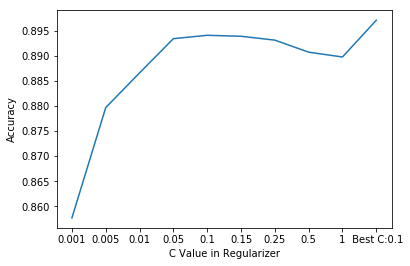

In [87]:

highestC = [regularization[i] for i in range(len(regularization)) if accuracy[i] == max(accuracy)][0]
final_model = LogisticRegression(C = highestC)
final_model.fit(X_train_review_bow,y_train)
y_pred = final_model.predict(X_test_review_bow)
print("Final Accuracy: %s" % accuracy_score(y_test, y_pred))
print("Highest C value:", str(highestC))
accuracy.append(accuracy_score(y_test, final_model.predict(X_test_review_bow)))
regularization.append(' Best C:' + str(highestC))
plt.xlabel("C Value in Regularizer")
plt.ylabel("Accuracy")
plt.plot(regularization, accuracy)

In [91]:
# Printing best and worst review Words
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer_review.get_feature_names(), final_model.coef_[0]
    )
}

print("Best Positive Terms:")
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
#     ('excellent', 0.9288812418118644)
#     ('perfect', 0.7934641227980576)
#     ('great', 0.675040909917553)
#     ('amazing', 0.6160398142631545)
#     ('superb', 0.6063967799425831)
    
print("Worst Negative Terms:")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)
    
#     ('worst', -1.367978497228895)
#     ('waste', -1.1684451288279047)
#     ('awful', -1.0277001734353677)
#     ('poorly', -0.8748317895742782)
#     ('boring', -0.8587249740682945)

Best Positive Terms:
('excellent', 0.9882504085534951)
('perfect', 0.9314409752011289)
('enjoyable', 0.8393411784905572)
('must see', 0.7918991536586091)
('amazing', 0.7733388685428209)
Worst Negative Terms:
('worst', -1.2858414550185377)
('awful', -1.1905077134787272)
('waste', -1.0493222743469273)
('boring', -0.9204644335195338)
('terrible', -0.8901758439238239)
